In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu

In [2]:
import seaborn as sns
print(sns.__version__)

0.12.2


In [3]:
def Get_rates_low_Beta(df,measure,order):
    ## return the rate in increasing orders
    df1_norm = df[(df["Distribution"]=="Normal") & (df[measure]==order[0])]
    df2_norm = df[(df["Distribution"]=="Normal") & (df[measure]==order[1])]
    df3_norm = df[(df["Distribution"]=="Normal") & (df[measure]==order[2])]
    
    df1_zipf = df[(df["Distribution"]=="Log-normal") & (df[measure]==order[0])]
    df2_zipf = df[(df["Distribution"]=="Log-normal") & (df[measure]==order[1])]
    df3_zipf = df[(df["Distribution"]=="Log-normal") & (df[measure]==order[2])]   
    
    TPRN1 = len(df1_norm[df1_norm["Bh_H"]<1])/500
    TPRZ1 = len(df1_zipf[df1_zipf["Bh_H"]<1])/500
    
    TPRN2 = len(df2_norm[df2_norm["Bh_H"]<1])/500
    TPRZ2 = len(df2_zipf[df2_zipf["Bh_H"]<1])/500
    
    TPRN3 = len(df3_norm[df3_norm["Bh_H"]<1])/500
    TPRZ3 = len(df3_zipf[df3_zipf["Bh_H"]<1])/500
    
    return TPRN1, TPRZ1, TPRN2, TPRZ2, TPRN3, TPRZ3
    
def Get_rates_High_Beta(df,measure,order):
    ## return the rate in increasing orders
    df1_norm = df[(df["Distribution"]=="Normal") & (df[measure]==order[0])]
    df2_norm = df[(df["Distribution"]=="Normal") & (df[measure]==order[1])]
    df3_norm = df[(df["Distribution"]=="Normal") & (df[measure]==order[2])]
    
    df1_zipf = df[(df["Distribution"]=="Log-normal") & (df[measure]==order[0])]
    df2_zipf = df[(df["Distribution"]=="Log-normal") & (df[measure]==order[1])]
    df3_zipf = df[(df["Distribution"]=="Log-normal") & (df[measure]==order[2])]   
    
    TPRN1 = len(df1_norm[df1_norm["Bh_L"]>1])/500
    TPRZ1 = len(df1_zipf[df1_zipf["Bh_L"]>1])/500
    
    TPRN2 = len(df2_norm[df2_norm["Bh_L"]>1])/500
    TPRZ2 = len(df2_zipf[df2_zipf["Bh_L"]>1])/500
    
    TPRN3 = len(df3_norm[df3_norm["Bh_L"]>1])/500
    TPRZ3 = len(df3_zipf[df3_zipf["Bh_L"]>1])/500
    
    return TPRN1, TPRZ1, TPRN2, TPRZ2, TPRN3, TPRZ3

def Get_rates_Betta(df):
    df1_norm = df[(df["Distribution"]=="Normal") & (df["Beta"]==2/3)]
    df2_norm = df[(df["Distribution"]=="Normal") & (df["Beta"]==5/6)]
    df3_norm = df[(df["Distribution"]=="Normal") & (df["Beta"]==7/6)]
    df4_norm = df[(df["Distribution"]=="Normal") & (df["Beta"]==4/3)]
    
    df1_Zipf = df[(df["Distribution"]=="Log-normal") & (df["Beta"]==2/3)]
    df2_Zipf = df[(df["Distribution"]=="Log-normal") & (df["Beta"]==5/6)]
    df3_Zipf = df[(df["Distribution"]=="Log-normal") & (df["Beta"]==7/6)]
    df4_Zipf = df[(df["Distribution"]=="Log-normal") & (df["Beta"]==4/3)]
    
    TPR1N = len(df1_norm[df1_norm["Bh_H"]<1])/500
    TPR2N = len(df2_norm[df2_norm["Bh_H"]<1])/500
    TPR3N = len(df3_norm[df3_norm["Bh_L"]>1])/500
    TPR4N = len(df4_norm[df4_norm["Bh_L"]>1])/500
    
    TPR1Z = len(df1_Zipf[df1_Zipf["Bh_H"]<1])/500
    TPR2Z = len(df2_Zipf[df2_Zipf["Bh_H"]<1])/500
    TPR3Z = len(df3_Zipf[df3_Zipf["Bh_L"]>1])/500
    TPR4Z = len(df4_Zipf[df4_Zipf["Bh_L"]>1])/500
    
    return TPR1N, TPR1Z, TPR2N, TPR2Z, TPR3N, TPR3Z, TPR4N, TPR4Z

In [4]:
palette = sns.color_palette()[0:2]

# Print the RGB values for the first (blue) and second (orange) colors
blue_rgb = palette[0]
orange_rgb = palette[1]
text_kwargs = dict(ha='center', va='center')

## Different betas

In [5]:
df = pd.read_csv("results_4Ns_topk.csv")
df.replace('Lognormal', 'Log-normal', regex=True, inplace=True)
df["diff"] = df["B_hat"]-df["Beta"]

C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

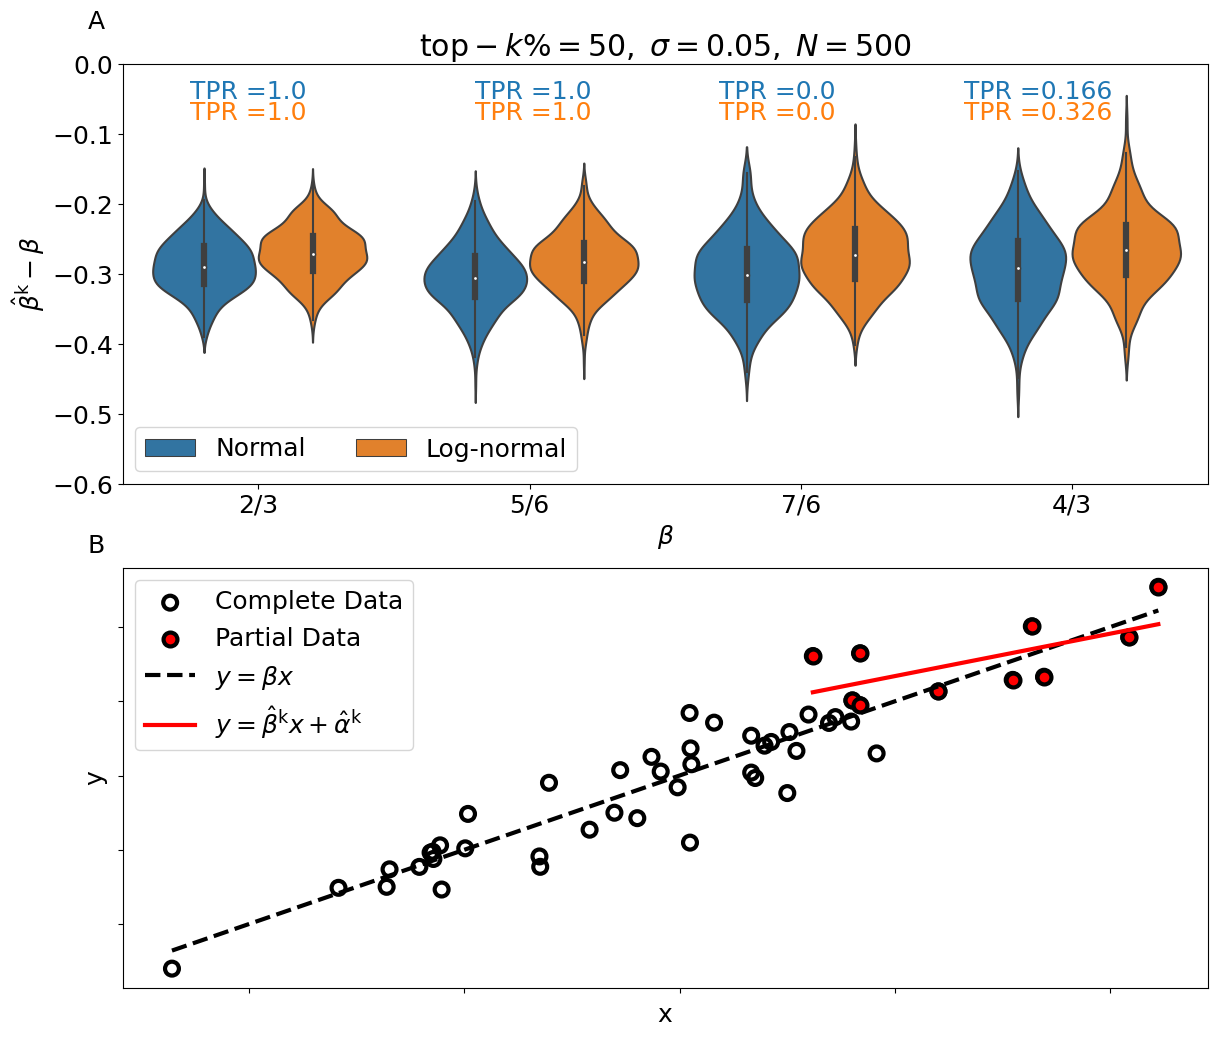

In [6]:
plt.rcParams.update({'font.size' : 18})
one_df = df[(df["N"]==500) & (df["sigma"]==0.05) & (df["topk"]==0.5)]
fig, axes = plt.subplots(2, 1, figsize=(14, 12))  


sns.violinplot(data=one_df, x="Beta", y="diff",  hue="Distribution", split=False,  palette=palette, ax=axes[0])

new_x_labels = ["2/3","5/6","7/6","4/3"] 
axes[0].set_xticklabels(["2/3","5/6","7/6","4/3"])
axes[0].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$");
axes[0].set_title(r"$\mathrm{top-}k\% = 50, \; \sigma = 0.05, \; N = 500$")
axes[0].set_ylim([-0.6,0])
axes[0].set_xlabel(r"$\beta$")
axes[0].legend(ncol = 2, loc = "lower left")
TPrs = Get_rates_Betta(one_df)
axes[0].text(-0.25,-0.05, "TPR ={}".format(TPrs[0]), color = blue_rgb)
axes[0].text(-0.25,-0.08, "TPR ={}".format(TPrs[1]), color = orange_rgb)

axes[0].text(0.8,-0.05, "TPR ={}".format(TPrs[2]), color = blue_rgb)
axes[0].text(0.8,-0.08, "TPR ={}".format(TPrs[3]), color = orange_rgb)


axes[0].text(1.7,-0.05, "TPR ={}".format(TPrs[4]), color = blue_rgb)
axes[0].text(1.7,-0.08, "TPR ={}".format(TPrs[5]), color = orange_rgb)

axes[0].text(2.6,-0.05, "TPR ={}".format(TPrs[6]), color = blue_rgb)
axes[0].text(2.6,-0.08, "TPR ={}".format(TPrs[7]), color = orange_rgb)
axes[0].text(-0.63,0.05, "A")


N = 50
np.random.seed(4)

# Data generation
X = np.random.normal(0, 0.2, N)
Y = X + np.random.normal(0, 0.08, N)

X_hat = X[np.where(Y>np.quantile(Y,1-0.2))]
Y_hat = Y[np.where(Y>np.quantile(Y,1-0.2))]

# Plotting scatter plot
axes[1].scatter(X, Y, label="Complete Data", color = "k",facecolors="None", s = 100, linewidth=3,)
axes[1].scatter(X_hat, Y_hat,color = "k",facecolors="r", label="Partial Data", s = 100, linewidth=3,)

# Linear regression (fitting line)
slope, intercept = np.polyfit(X, Y, 1)
axes[1].plot([X.min(),X.max()], [X.min(),X.max()], color='k', linestyle='dashed' ,label=r"$y = \beta x$", 
            linewidth=3)

slope, intercept = np.polyfit(X_hat, Y_hat, 1)
# axes[0].plot(X_hat, slope * X_hat + intercept,color='k', label=r"$Y = \hat{\beta}^k X$")
axes[1].plot([X_hat.min(),X_hat.max()], [(slope * X_hat + intercept).min(),(slope * X_hat + intercept).max()],
             color='r', label=r"$y = \hat{\beta}^\mathrm{k} x + \hat{\alpha}^{\mathrm{k}}$", linewidth=3)


# Adding labels and legend
axes[1].set_yticklabels([])
axes[1].set_xticklabels([])
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].legend()
axes[1].text(-0.55,0.6, "B")




#plt.savefig("Bettas.pdf",bbox_inches="tight")
plt.show()

## N panels

## N = 100, 300, 500, 800, 3000

In [7]:
df = pd.read_csv("results_4Ns_topk.csv")
df.replace('Lognormal', 'Log-normal', regex=True, inplace=True)
df["diff"] = df["B_hat"]-df["Beta"]

In [8]:
df = df[~df['N'].isin([300, 800])]

## 3x2 panel N=100, 500, 3000

C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

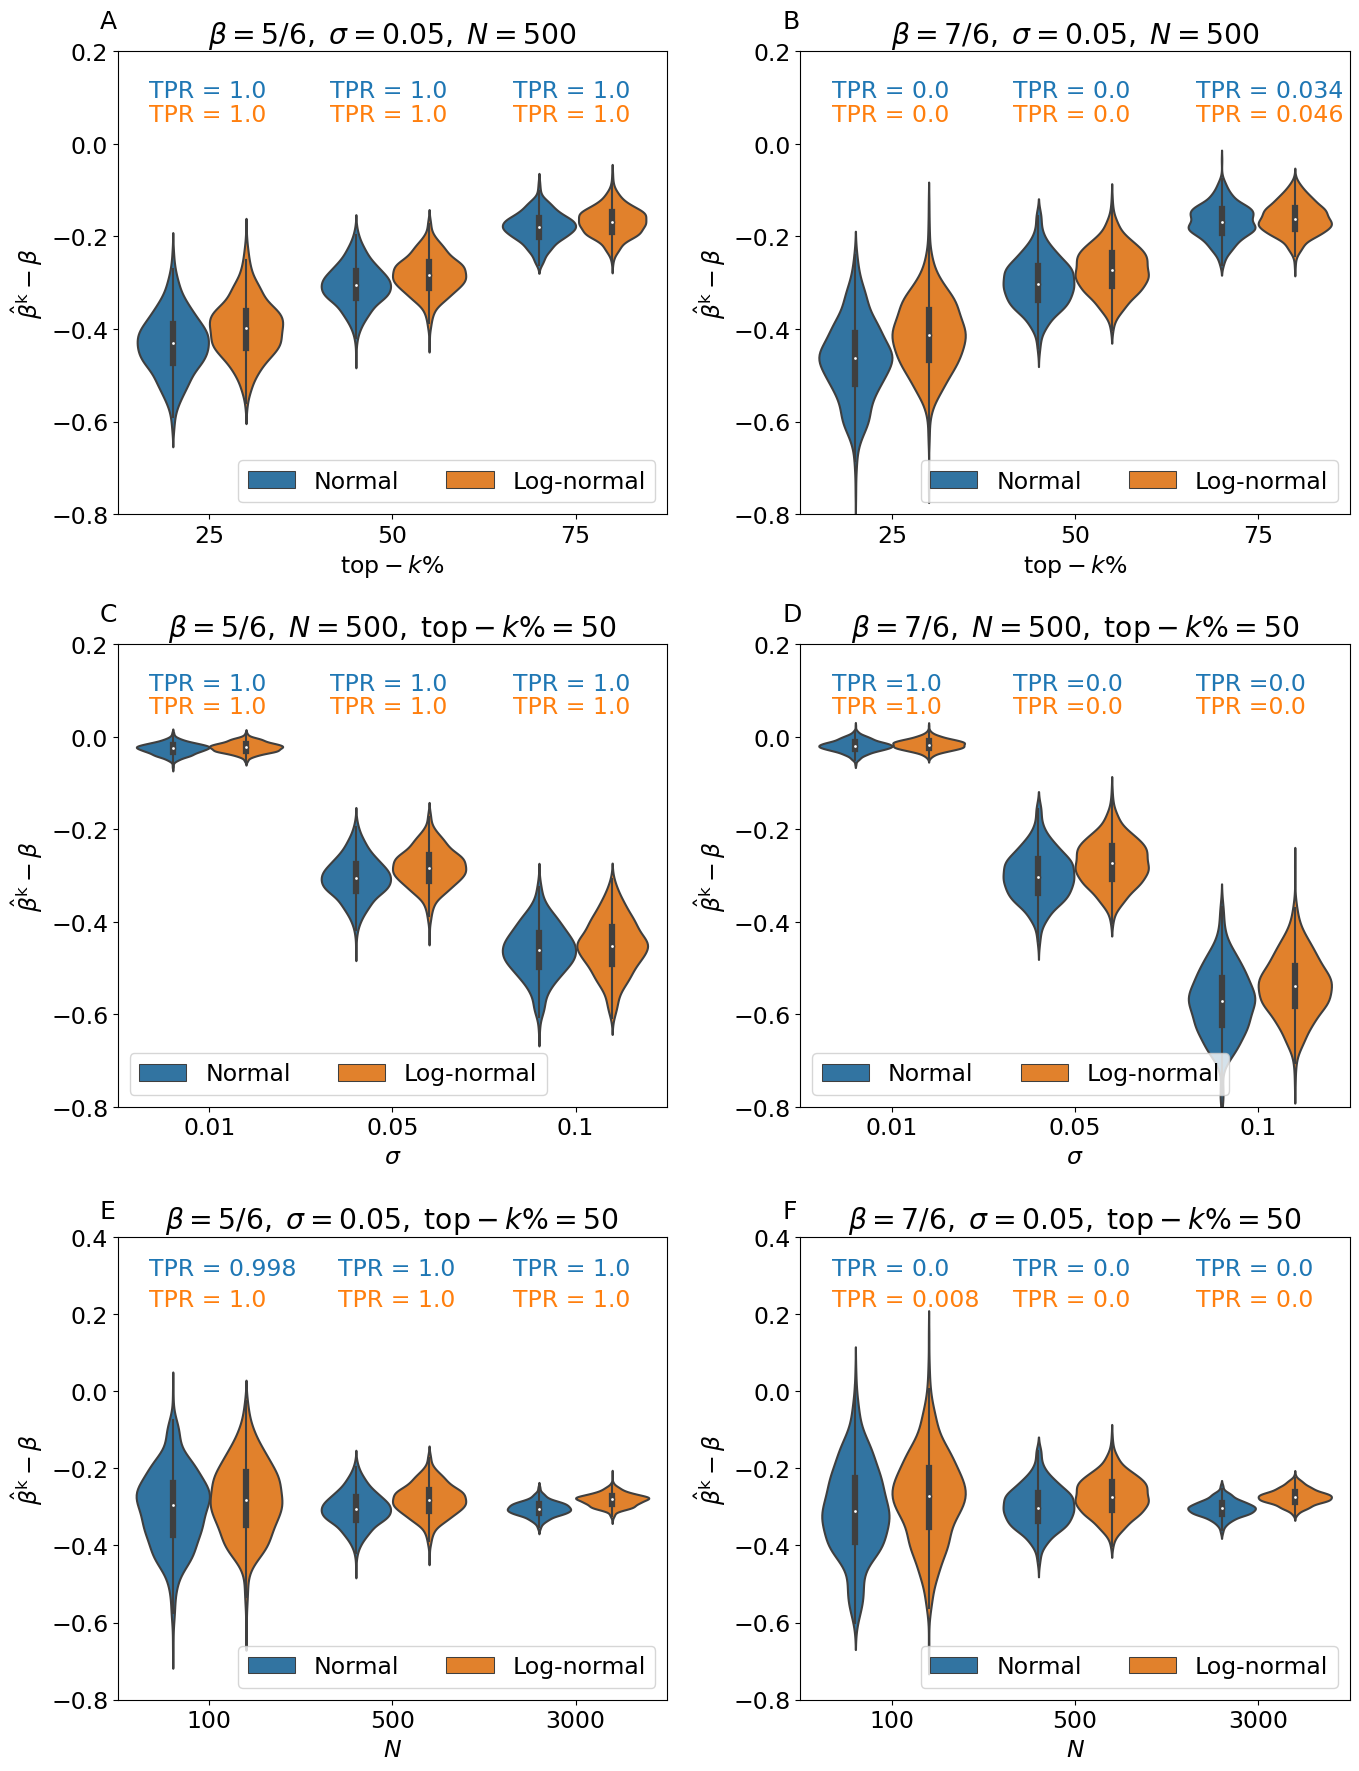

In [9]:
oneone_df = df[(df["N"]==500) & (df["sigma"]==0.05) & (df["Beta"]==5/6)]
twoone_df = df[(df["topk"]==0.5) & (df["sigma"]==0.05) & (df["Beta"]==5/6)]
threeone_df = df[(df["topk"]==0.5) & (df["N"]==500) & (df["Beta"]==5/6)]

onetwo_df = df[(df["N"]==500) & (df["sigma"]==0.05) & (df["Beta"]==7/6)]
twotwodf = df[(df["topk"]==0.5) & (df["sigma"]==0.05) & (df["Beta"]==7/6)]
threetwo_df = df[(df["topk"]==0.5) & (df["N"]==500) & (df["Beta"]==7/6)]

plt.rcParams.update({'font.size' : 17})

fig, axes = plt.subplots(3,2, figsize=(14, 18))  # 2 rows, 2 columns

# oneone
sns.violinplot(data=oneone_df, x="topk", y="diff", hue="Distribution", split=False, ax=axes[0, 0])
axes[0, 0].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[0, 0].set_xlabel(r"$\mathrm{top-}k\%$")
axes[0, 0].set_title(r"$\beta = 5/6, \; \sigma = 0.05, \; N = 500$")
axes[0, 0].set_ylim([-0.8,0.2])
# axes[0, 0].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[0, 0].axhline(y=1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = 1/6$")
axes[0, 0].legend(ncol = 3, loc = "lower right")
TPRs = Get_rates_low_Beta(oneone_df, "topk", [0.25,0.5,0.75])
axes[0, 0].text(-0.33,0.1, "TPR = {}".format(f"{TPRs[0]:.1f}"), color = blue_rgb)
axes[0, 0].text(-0.33,0.05, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[0, 0].text(0.66,0.1, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[0, 0].text(0.66,0.05, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[0, 0].text(1.66,0.1, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[0, 0].text(1.66,0.05, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[0, 0].text(-0.6,0.25, "A", fontsize = 18)
axes[0, 0].set_xticklabels(["25", "50", "75"])



# onetwo
sns.violinplot(data=onetwo_df, x="topk", y="diff", hue="Distribution", split=False, ax=axes[0, 1])
axes[0, 1].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[0, 1].set_xlabel(r"$\mathrm{top-}k\%$")
axes[0, 1].set_title(r"$\beta = 7/6, \; \sigma = 0.05, \; N = 500$")
axes[0, 1].set_ylim([-0.8,0.2])
# axes[0, 1].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[0, 1].axhline(y=-1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = -1/6$")
axes[0, 1].legend(ncol = 3, loc = "lower right")
TPRs = Get_rates_High_Beta(onetwo_df, "topk", [0.25,0.5,0.75])
axes[0, 1].text(-0.33,0.1, "TPR = {}".format(TPRs[0]), color = blue_rgb)
axes[0, 1].text(-0.33,0.05, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[0, 1].text(0.66,0.1, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[0, 1].text(0.66,0.05, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[0, 1].text(1.66,0.1, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[0, 1].text(1.66,0.05, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[0, 1].text(-0.6,0.25, "B", fontsize = 18)
axes[0, 1].set_xticklabels(["25", "50", "75"])


# threeone
sns.violinplot(data=threeone_df, x="sigma", y="diff", hue="Distribution", split=False, ax=axes[1, 0])
axes[1, 0].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[1, 0].set_xlabel(r"$\sigma$")
axes[1, 0].set_title(r"$\beta = 5/6, \; N = 500, \; \mathrm{top-}k\% = 50$")
axes[1, 0].set_ylim([-0.8,0.2])
# axes[2, 0].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[2, 0].axhline(y=1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = 1/6$")
axes[1, 0].legend(ncol = 3, loc = "lower left")
TPRs = Get_rates_low_Beta(threeone_df, "sigma", [0.01,0.05,0.1])
axes[1, 0].text(-0.33,0.1, "TPR = {}".format(TPRs[0]), color = blue_rgb)
axes[1, 0].text(-0.33,0.05, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[1, 0].text(0.66,0.1, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[1, 0].text(0.66,0.05, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[1, 0].text(1.66,0.1, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[1, 0].text(1.66,0.05, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[1, 0].text(-0.6,0.25, "C", fontsize = 18)


# threetwo
sns.violinplot(data=threetwo_df, x="sigma", y="diff", hue="Distribution", split=False, ax=axes[1, 1])
axes[1, 1].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[1, 1].set_xlabel(r"$\sigma$")
axes[1, 1].set_title(r"$\beta = 7/6, \; N = 500, \; \mathrm{top-}k\% = 50$")
axes[1, 1].set_ylim([-0.8,0.2])
# axes[2, 1].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[2, 1].axhline(y=-1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = -1/6$")
axes[1, 1].legend(ncol = 3, loc = "lower left")
TPRs = Get_rates_High_Beta(threetwo_df, "sigma", [0.01,0.05,0.1])
axes[1, 1].text(-0.33,0.1, "TPR ={}".format(TPRs[0]), color = blue_rgb)
axes[1, 1].text(-0.33,0.05, "TPR ={}".format(TPRs[1]), color = orange_rgb)
axes[1, 1].text(0.66,0.1, "TPR ={}".format(TPRs[2]), color = blue_rgb)
axes[1, 1].text(0.66,0.05, "TPR ={}".format(TPRs[3]), color = orange_rgb)
axes[1, 1].text(1.66,0.1, "TPR ={}".format(TPRs[4]), color = blue_rgb)
axes[1, 1].text(1.66,0.05, "TPR ={}".format(TPRs[5]), color = orange_rgb)
axes[1, 1].text(-0.6,0.25, "D", fontsize = 18)


# twoone
sns.violinplot(data=twoone_df, x="N", y="diff", hue="Distribution", split=False, ax=axes[2, 0])
axes[2, 0].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[2, 0].set_xlabel(r"$N$")
axes[2, 0].set_title(r"$\beta = 5/6, \; \sigma = 0.05, \; \mathrm{top-}k\% = 50$")
axes[2, 0].set_ylim([-0.8,0.4])
# axes[1, 0].axhline(y=1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = 1/6$")
axes[2, 0].legend(ncol = 3, loc = "lower right")
TPRs = Get_rates_low_Beta(twoone_df, "N", [100, 500, 3000])
axes[2, 0].text(-0.33,0.3, "TPR = {}".format(TPRs[0]), color = blue_rgb)
axes[2, 0].text(-0.33,0.22, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[2, 0].text(0.7,0.3, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[2, 0].text(0.7,0.22, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[2, 0].text(1.66,0.3, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[2, 0].text(1.66,0.22, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[2, 0].text(-0.6,0.45, "E", fontsize = 18)


# twotwo
sns.violinplot(data=twotwodf, x="N", y="diff", hue="Distribution", split=False, ax=axes[2, 1])
axes[2, 1].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[2, 1].set_xlabel(r"$N$")
axes[2, 1].set_title(r"$\beta = 7/6, \; \sigma = 0.05, \; \mathrm{top-}k\% = 50$")
axes[2, 1].set_ylim([-0.8,0.4])
# axes[1, 1].axhline(y=-1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = -1/6$")
axes[2, 1].legend(ncol = 3, loc = "lower right")
TPRs = Get_rates_High_Beta(twotwodf, "N", [100, 500, 3000])
axes[2, 1].text(-0.33,0.3, "TPR = {}".format(TPRs[0]), color = blue_rgb)
axes[2, 1].text(-0.33,0.22, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[2, 1].text(0.66,0.3, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[2, 1].text(0.66,0.22, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[2, 1].text(1.66,0.3, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[2, 1].text(1.66,0.22, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[2, 1].text(-0.6,0.45, "F", fontsize = 18)


# Adjust layout to prevent overlap
plt.tight_layout()
#plt.savefig("main_N_500_4N.pdf")
plt.show()

C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

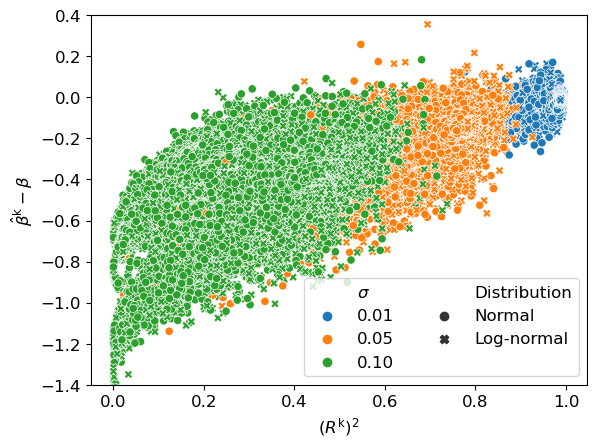

In [10]:
plt.rcParams.update({'font.size' : 12})

sns.scatterplot(data=df, x="R2", y="diff", hue="sigma", style="Distribution",palette=sns.color_palette()[0:3])
plt.ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$");
plt.xlabel(r"$(R^{\mathrm{k}})^2$");
plt.ylim([-1.4,0.4])

legend = plt.legend(ncol=2)

# Update legend labels
new_labels = [r"$\sigma$", '0.01', '0.05',"0.10","Distribution","Normal","Log-normal"]  # Replace with your desired labels
for text, new_label in zip(legend.texts, new_labels):
    text.set_text(new_label)
#plt.savefig("scatter.png", bbox_inches="tight", dpi = 300)
plt.show()

## 3x2 panel N=100, 500, 3000 beta=2/3, 4/3

C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

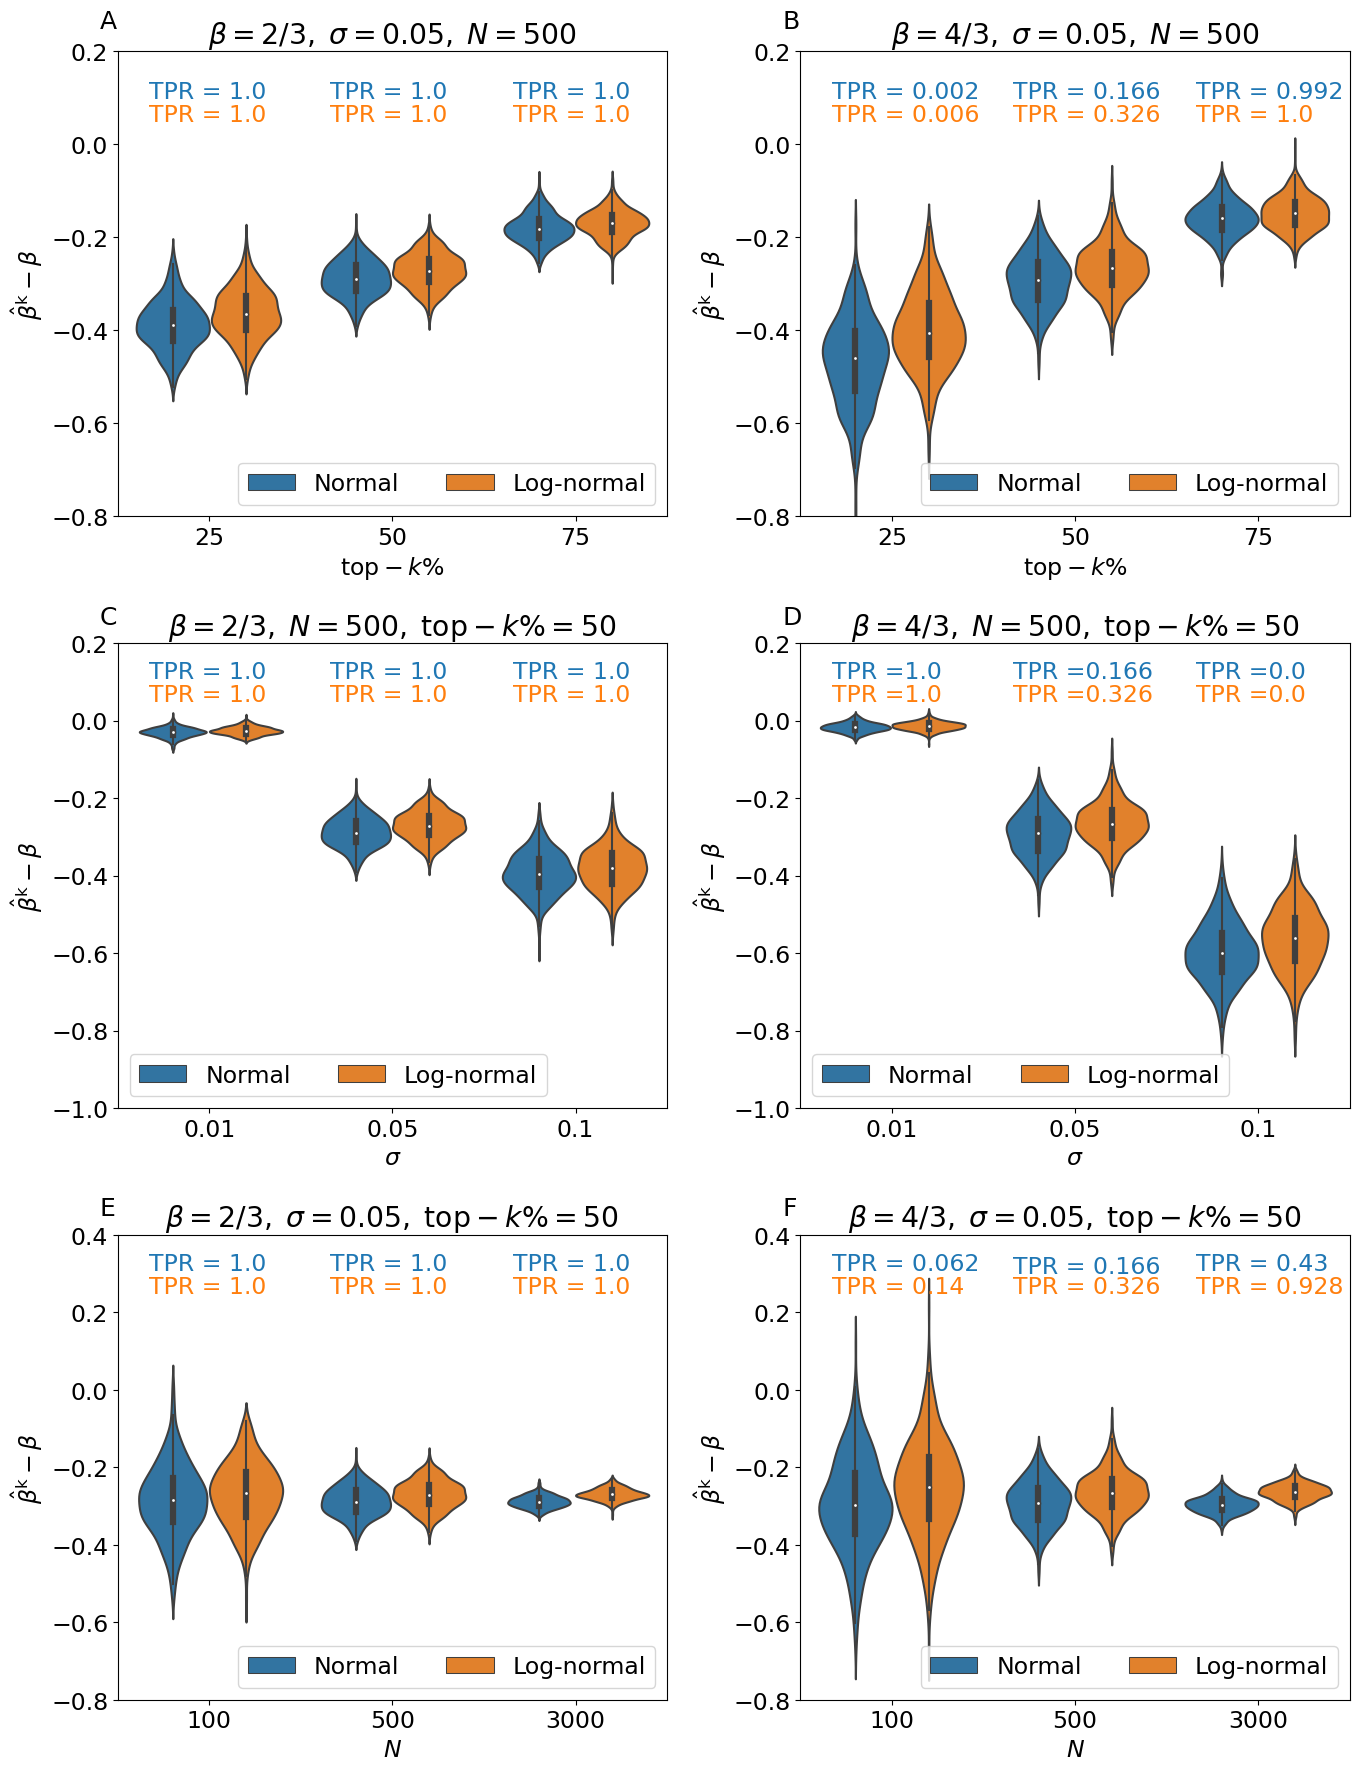

In [11]:
oneone_df = df[(df["N"]==500) & (df["sigma"]==0.05) & (df["Beta"]==2/3)]
twoone_df = df[(df["topk"]==0.5) & (df["sigma"]==0.05) & (df["Beta"]==2/3)]
threeone_df = df[(df["topk"]==0.5) & (df["N"]==500) & (df["Beta"]==2/3)]

onetwo_df = df[(df["N"]==500) & (df["sigma"]==0.05) & (df["Beta"]==4/3)]
twotwodf = df[(df["topk"]==0.5) & (df["sigma"]==0.05) & (df["Beta"]==4/3)]
threetwo_df = df[(df["topk"]==0.5) & (df["N"]==500) & (df["Beta"]==4/3)]

plt.rcParams.update({'font.size' : 17})

fig, axes = plt.subplots(3,2, figsize=(14, 18))  # 2 rows, 2 columns

# oneone
sns.violinplot(data=oneone_df, x="topk", y="diff", hue="Distribution", split=False, ax=axes[0, 0])
axes[0, 0].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[0, 0].set_xlabel(r"$\mathrm{top-}k\%$")
axes[0, 0].set_title(r"$\beta = 2/3, \; \sigma = 0.05, \; N = 500$")
axes[0, 0].set_ylim([-0.8,0.2])
# axes[0, 0].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[0, 0].axhline(y=1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = 1/6$")
axes[0, 0].legend(ncol = 3, loc = "lower right")
TPRs = Get_rates_low_Beta(oneone_df, "topk", [0.25,0.5,0.75])
axes[0, 0].text(-0.33,0.1, "TPR = {}".format(f"{TPRs[0]:.1f}"), color = blue_rgb)
axes[0, 0].text(-0.33,0.05, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[0, 0].text(0.66,0.1, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[0, 0].text(0.66,0.05, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[0, 0].text(1.66,0.1, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[0, 0].text(1.66,0.05, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[0, 0].text(-0.6,0.25, "A", fontsize = 18)
axes[0, 0].set_xticklabels(["25", "50", "75"])



# onetwo
sns.violinplot(data=onetwo_df, x="topk", y="diff", hue="Distribution", split=False, ax=axes[0, 1])
axes[0, 1].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[0, 1].set_xlabel(r"$\mathrm{top-}k\%$")
axes[0, 1].set_title(r"$\beta = 4/3, \; \sigma = 0.05, \; N = 500$")
axes[0, 1].set_ylim([-0.8,0.2])
# axes[0, 1].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[0, 1].axhline(y=-1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = -1/6$")
axes[0, 1].legend(ncol = 3, loc = "lower right")
TPRs = Get_rates_High_Beta(onetwo_df, "topk", [0.25,0.5,0.75])
axes[0, 1].text(-0.33,0.1, "TPR = {}".format(TPRs[0]), color = blue_rgb)
axes[0, 1].text(-0.33,0.05, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[0, 1].text(0.66,0.1, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[0, 1].text(0.66,0.05, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[0, 1].text(1.66,0.1, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[0, 1].text(1.66,0.05, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[0, 1].text(-0.6,0.25, "B", fontsize = 18)
axes[0, 1].set_xticklabels(["25", "50", "75"])


# threeone
sns.violinplot(data=threeone_df, x="sigma", y="diff", hue="Distribution", split=False, ax=axes[1, 0])
axes[1, 0].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[1, 0].set_xlabel(r"$\sigma$")
axes[1, 0].set_title(r"$\beta = 2/3, \; N = 500, \; \mathrm{top-}k\% = 50$")
axes[1, 0].set_ylim([-1,0.2])
# axes[2, 0].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[2, 0].axhline(y=1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = 1/6$")
axes[1, 0].legend(ncol = 3, loc = "lower left")
TPRs = Get_rates_low_Beta(threeone_df, "sigma", [0.01,0.05,0.1])
axes[1, 0].text(-0.33,0.11, "TPR = {}".format(TPRs[0]), color = blue_rgb)
axes[1, 0].text(-0.33,0.05, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[1, 0].text(0.66,0.11, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[1, 0].text(0.66,0.05, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[1, 0].text(1.66,0.11, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[1, 0].text(1.66,0.05, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[1, 0].text(-0.6,0.25, "C", fontsize = 18)




# threetwo
sns.violinplot(data=threetwo_df, x="sigma", y="diff", hue="Distribution", split=False, ax=axes[1, 1])
axes[1, 1].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[1, 1].set_xlabel(r"$\sigma$")
axes[1, 1].set_title(r"$\beta = 4/3, \; N = 500, \; \mathrm{top-}k\% = 50$")
axes[1, 1].set_ylim([-1,0.2])
# axes[2, 1].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[2, 1].axhline(y=-1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = -1/6$")
axes[1, 1].legend(ncol = 3, loc = "lower left")
TPRs = Get_rates_High_Beta(threetwo_df, "sigma", [0.01,0.05,0.1])
axes[1, 1].text(-0.33,0.11, "TPR ={}".format(TPRs[0]), color = blue_rgb)
axes[1, 1].text(-0.33,0.05, "TPR ={}".format(TPRs[1]), color = orange_rgb)
axes[1, 1].text(0.66,0.11, "TPR ={}".format(TPRs[2]), color = blue_rgb)
axes[1, 1].text(0.66,0.05, "TPR ={}".format(TPRs[3]), color = orange_rgb)
axes[1, 1].text(1.66,0.11, "TPR ={}".format(TPRs[4]), color = blue_rgb)
axes[1, 1].text(1.66,0.05, "TPR ={}".format(TPRs[5]), color = orange_rgb)
axes[1, 1].text(-0.6,0.25, "D", fontsize = 18)


# twoone
sns.violinplot(data=twoone_df, x="N", y="diff", hue="Distribution", split=False, ax=axes[2, 0])
axes[2, 0].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[2, 0].set_xlabel(r"$N$")
axes[2, 0].set_title(r"$\beta = 2/3, \; \sigma = 0.05, \; \mathrm{top-}k\% = 50$")
axes[2, 0].set_ylim([-0.8,0.4])
# axes[1, 0].axhline(y=1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = 1/6$")
axes[2, 0].legend(ncol = 3, loc = "lower right")
TPRs = Get_rates_low_Beta(twoone_df, "N", [100, 500, 3000])
axes[2, 0].text(-0.33,0.31, "TPR = {}".format(TPRs[0]), color = blue_rgb)
axes[2, 0].text(-0.33,0.25, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[2, 0].text(0.66,0.31, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[2, 0].text(0.66,0.25, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[2, 0].text(1.66,0.31, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[2, 0].text(1.66,0.25, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[2, 0].text(-0.6,0.45, "E", fontsize = 18)



# twotwo
sns.violinplot(data=twotwodf, x="N", y="diff", hue="Distribution", split=False, ax=axes[2, 1])
axes[2, 1].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[2, 1].set_xlabel(r"$N$")
axes[2, 1].set_title(r"$\beta = 4/3, \; \sigma = 0.05, \; \mathrm{top-}k\% = 50$")
axes[2, 1].set_ylim([-0.8,0.4])
# axes[1, 1].axhline(y=-1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = -1/6$")
axes[2, 1].legend(ncol = 3, loc = "lower right")
TPRs = Get_rates_High_Beta(twotwodf, "N", [100, 500, 3000])
axes[2, 1].text(-0.33,0.31, "TPR = {}".format(TPRs[0]), color = blue_rgb)
axes[2, 1].text(-0.33,0.25, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[2, 1].text(0.66,0.3, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[2, 1].text(0.66,0.25, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[2, 1].text(1.66,0.31, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[2, 1].text(1.66,0.25, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[2, 1].text(-0.6,0.45, "F", fontsize = 18)


# Adjust layout to prevent overlap
plt.tight_layout()
#plt.savefig("sup_N_500_4N_otherBeta.pdf")
plt.show()

## 2x2 panel N = 100

C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

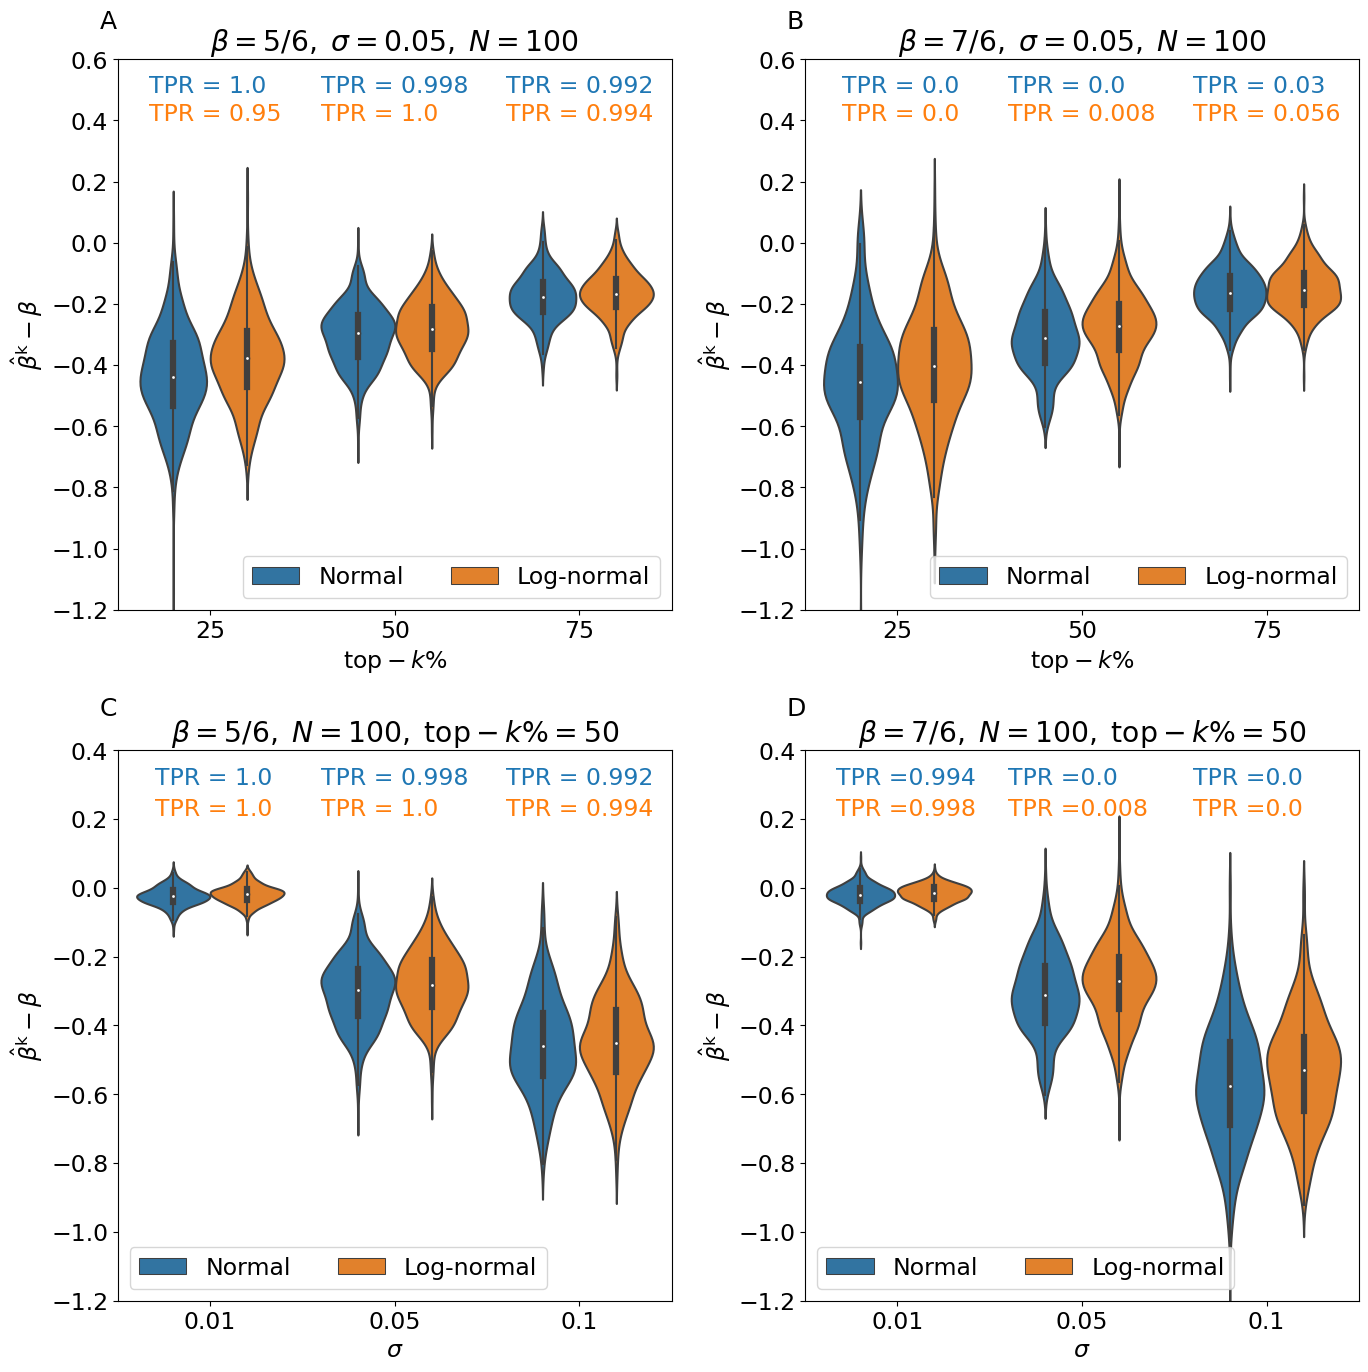

In [12]:
oneone_df = df[(df["N"]==100) & (df["sigma"]==0.05) & (df["Beta"]==5/6)]
#twoone_df = df[(df["topk"]==0.5) & (df["sigma"]==0.05) & (df["Beta"]==5/6)]
threeone_df = df[(df["topk"]==0.5) & (df["N"]==100) & (df["Beta"]==5/6)]

onetwo_df = df[(df["N"]==100) & (df["sigma"]==0.05) & (df["Beta"]==7/6)]
#twotwodf = df[(df["topk"]==0.5) & (df["sigma"]==0.05) & (df["Beta"]==7/6)]
threetwo_df = df[(df["topk"]==0.5) & (df["N"]==100) & (df["Beta"]==7/6)]

plt.rcParams.update({'font.size' : 17})

fig, axes = plt.subplots(2,2, figsize=(14, 14))  # 2 rows, 2 columns

# oneone
sns.violinplot(data=oneone_df, x="topk", y="diff", hue="Distribution", split=False, ax=axes[0, 0])
axes[0, 0].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[0, 0].set_xlabel(r"$\mathrm{top-}k\%$")
axes[0, 0].set_title(r"$\beta = 5/6, \; \sigma = 0.05, \; N = 100$")
axes[0, 0].set_ylim([-1.2,0.6])
# axes[0, 0].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[0, 0].axhline(y=1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = 1/6$")
axes[0, 0].legend(ncol = 3, loc = "lower right")
TPRs = Get_rates_low_Beta(oneone_df, "topk", [0.25,0.5,0.75])
axes[0, 0].text(-0.33,0.49, "TPR = {}".format(f"{TPRs[0]:.1f}"), color = blue_rgb)
axes[0, 0].text(-0.33,0.4, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[0, 0].text(0.6,0.49, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[0, 0].text(0.6,0.4, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[0, 0].text(1.6,0.49, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[0, 0].text(1.6,0.4, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[0, 0].text(-0.6,0.7, "A", fontsize = 18)
axes[0, 0].set_xticklabels(["25", "50", "75"])



# onetwo
sns.violinplot(data=onetwo_df, x="topk", y="diff", hue="Distribution", split=False, ax=axes[0, 1])
axes[0, 1].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[0, 1].set_xlabel(r"$\mathrm{top-}k\%$")
axes[0, 1].set_title(r"$\beta = 7/6, \; \sigma = 0.05, \; N = 100$")
axes[0, 1].set_ylim([-1.2,0.6])
# axes[0, 1].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[0, 1].axhline(y=-1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = -1/6$")
axes[0, 1].legend(ncol = 3, loc = "lower right")
TPRs = Get_rates_High_Beta(onetwo_df, "topk", [0.25,0.5,0.75])
axes[0, 1].text(-0.3,0.49, "TPR = {}".format(TPRs[0]), color = blue_rgb)
axes[0, 1].text(-0.3,0.4, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[0, 1].text(0.6,0.49, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[0, 1].text(0.6,0.4, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[0, 1].text(1.6,0.49, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[0, 1].text(1.6,0.4, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[0, 1].text(-0.6,0.7, "B", fontsize = 18)
axes[0, 1].set_xticklabels(["25", "50", "75"])


# threeone
sns.violinplot(data=threeone_df, x="sigma", y="diff", hue="Distribution", split=False, ax=axes[1, 0])
axes[1, 0].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[1, 0].set_xlabel(r"$\sigma$")
axes[1, 0].set_title(r"$\beta = 5/6, \; N = 100, \; \mathrm{top-}k\% = 50$")
axes[1, 0].set_ylim([-1.2,0.4])
# axes[2, 0].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[2, 0].axhline(y=1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = 1/6$")
axes[1, 0].legend(ncol = 3, loc = "lower left")
TPRs = Get_rates_low_Beta(threeone_df, "sigma", [0.01,0.05,0.1])
axes[1, 0].text(-0.3,0.3, "TPR = {}".format(TPRs[0]), color = blue_rgb)
axes[1, 0].text(-0.3,0.21, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[1, 0].text(0.6,0.3, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[1, 0].text(0.6,0.21, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[1, 0].text(1.6,0.3, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[1, 0].text(1.6,0.21, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[1, 0].text(-0.6,0.5, "C", fontsize = 18)




# threetwo
sns.violinplot(data=threetwo_df, x="sigma", y="diff", hue="Distribution", split=False, ax=axes[1, 1])
axes[1, 1].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[1, 1].set_xlabel(r"$\sigma$")
axes[1, 1].set_title(r"$\beta = 7/6, \; N = 100, \; \mathrm{top-}k\% = 50$")
axes[1, 1].set_ylim([-1.2,0.4])
# axes[2, 1].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[2, 1].axhline(y=-1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = -1/6$")
axes[1, 1].legend(ncol = 3, loc = "lower left")
TPRs = Get_rates_High_Beta(threetwo_df, "sigma", [0.01,0.05,0.1])
axes[1, 1].text(-0.33,0.3, "TPR ={}".format(TPRs[0]), color = blue_rgb)
axes[1, 1].text(-0.33,0.21, "TPR ={}".format(TPRs[1]), color = orange_rgb)
axes[1, 1].text(0.6,0.3, "TPR ={}".format(TPRs[2]), color = blue_rgb)
axes[1, 1].text(0.6,0.21, "TPR ={}".format(TPRs[3]), color = orange_rgb)
axes[1, 1].text(1.6,0.3, "TPR ={}".format(TPRs[4]), color = blue_rgb)
axes[1, 1].text(1.6,0.21, "TPR ={}".format(TPRs[5]), color = orange_rgb)
axes[1, 1].text(-0.6,0.5, "D", fontsize = 18)



# Adjust layout to prevent overlap
plt.tight_layout()
#plt.savefig("sup_N_100_2x2.pdf")
plt.show()

## 2x2 panel N = 3000

C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

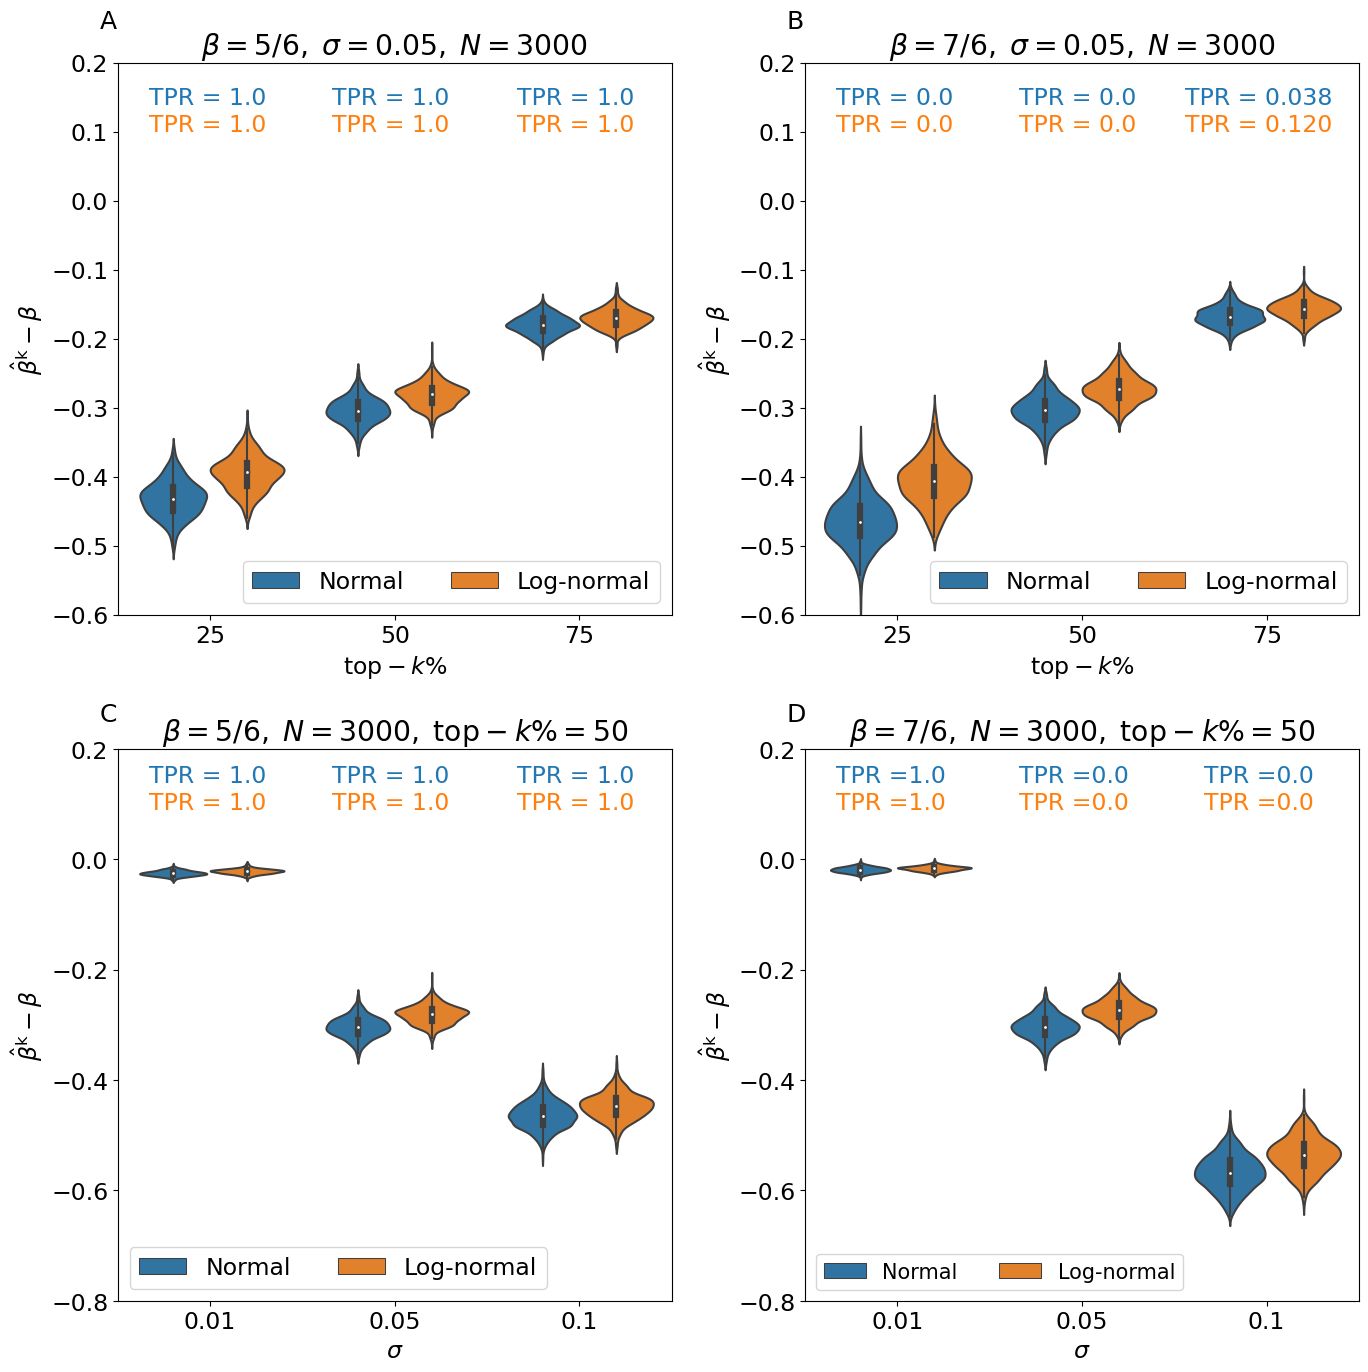

In [13]:
oneone_df = df[(df["N"]==3000) & (df["sigma"]==0.05) & (df["Beta"]==5/6)]
#twoone_df = df[(df["topk"]==0.5) & (df["sigma"]==0.05) & (df["Beta"]==5/6)]
threeone_df = df[(df["topk"]==0.5) & (df["N"]==3000) & (df["Beta"]==5/6)]

onetwo_df = df[(df["N"]==3000) & (df["sigma"]==0.05) & (df["Beta"]==7/6)]
#twotwodf = df[(df["topk"]==0.5) & (df["sigma"]==0.05) & (df["Beta"]==7/6)]
threetwo_df = df[(df["topk"]==0.5) & (df["N"]==3000) & (df["Beta"]==7/6)]

plt.rcParams.update({'font.size' : 17})

fig, axes = plt.subplots(2,2, figsize=(14, 14))  # 2 rows, 2 columns

# oneone
sns.violinplot(data=oneone_df, x="topk", y="diff", hue="Distribution", split=False, ax=axes[0, 0])
axes[0, 0].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[0, 0].set_xlabel(r"$\mathrm{top-}k\%$")
axes[0, 0].set_title(r"$\beta = 5/6, \; \sigma = 0.05, \; N = 3000$")
axes[0, 0].set_ylim([-0.6,0.2])
# axes[0, 0].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[0, 0].axhline(y=1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = 1/6$")
axes[0, 0].legend(ncol = 3, loc = "lower right")
TPRs = Get_rates_low_Beta(oneone_df, "topk", [0.25,0.5,0.75])
axes[0, 0].text(-0.33,0.14, "TPR = {}".format(f"{TPRs[0]:.1f}"), color = blue_rgb)
axes[0, 0].text(-0.33,0.1, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[0, 0].text(0.66,0.14, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[0, 0].text(0.66,0.1, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[0, 0].text(1.66,0.14, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[0, 0].text(1.66,0.1, "TPR = {}".format(TPRs[5]), color = orange_rgb)
axes[0, 0].text(-0.6,0.25, "A", fontsize = 18)
axes[0, 0].set_xticklabels(["25", "50", "75"])



# onetwo
sns.violinplot(data=onetwo_df, x="topk", y="diff", hue="Distribution", split=False, ax=axes[0, 1])
axes[0, 1].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[0, 1].set_xlabel(r"$\mathrm{top-}k\%$")
axes[0, 1].set_title(r"$\beta = 7/6, \; \sigma = 0.05, \; N = 3000$")
axes[0, 1].set_ylim([-0.6,0.2])
# axes[0, 1].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[0, 1].axhline(y=-1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = -1/6$")
axes[0, 1].legend(ncol = 3, loc = "lower right")
TPRs = Get_rates_High_Beta(onetwo_df, "topk", [0.25,0.5,0.75])
axes[0, 1].text(-0.33,0.14, "TPR = {}".format(TPRs[0]), color = blue_rgb)
axes[0, 1].text(-0.33,0.1, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[0, 1].text(0.66,0.14, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[0, 1].text(0.66,0.1, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[0, 1].text(1.56,0.14, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[0, 1].text(1.56,0.1, "TPR = {}".format(f"{TPRs[5]:.3f}"), color = orange_rgb)
axes[0, 1].text(-0.6,0.25, "B", fontsize = 18)
axes[0, 1].set_xticklabels(["25", "50", "75"])


# threeone
sns.violinplot(data=threeone_df, x="sigma", y="diff", hue="Distribution", split=False, ax=axes[1, 0])
axes[1, 0].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[1, 0].set_xlabel(r"$\sigma$")
axes[1, 0].set_title(r"$\beta = 5/6, \; N = 3000, \; \mathrm{top-}k\% = 50$")
axes[1, 0].set_ylim([-0.8,0.2])
# axes[2, 0].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[2, 0].axhline(y=1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = 1/6$")
axes[1, 0].legend(ncol = 3, loc = "lower left")
TPRs = Get_rates_low_Beta(threeone_df, "sigma", [0.01,0.05,0.1])
axes[1, 0].text(-0.33,0.14, "TPR = {}".format(TPRs[0]), color = blue_rgb)
axes[1, 0].text(-0.33,0.09, "TPR = {}".format(TPRs[1]), color = orange_rgb)
axes[1, 0].text(0.66,0.14, "TPR = {}".format(TPRs[2]), color = blue_rgb)
axes[1, 0].text(0.66,0.09, "TPR = {}".format(TPRs[3]), color = orange_rgb)
axes[1, 0].text(1.66,0.14, "TPR = {}".format(TPRs[4]), color = blue_rgb)
axes[1, 0].text(1.66,0.09, "TPR = {}".format(f"{TPRs[5]:.1f}"), color = orange_rgb)
axes[1, 0].text(-0.6,0.25, "C", fontsize = 18)




# threetwo
sns.violinplot(data=threetwo_df, x="sigma", y="diff", hue="Distribution", split=False, ax=axes[1, 1])
axes[1, 1].set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$")
axes[1, 1].set_xlabel(r"$\sigma$")
axes[1, 1].set_title(r"$\beta = 7/6, \; N = 3000, \; \mathrm{top-}k\% = 50$")
axes[1, 1].set_ylim([-0.8,0.2])
# axes[2, 1].set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
# axes[2, 1].axhline(y=-1/6, linestyle='--', color='black', label=r"$\hat{\beta}_k-\beta = -1/6$")
axes[1, 1].legend(ncol = 3, loc = "lower left", fontsize = 15)
TPRs = Get_rates_High_Beta(threetwo_df, "sigma", [0.01,0.05,0.1])
axes[1, 1].text(-0.33,0.14, "TPR ={}".format(f"{TPRs[0]:.1f}"), color = blue_rgb)
axes[1, 1].text(-0.33,0.09, "TPR ={}".format(f"{TPRs[1]:.1f}"), color = orange_rgb)
axes[1, 1].text(0.66,0.14, "TPR ={}".format(TPRs[2]), color = blue_rgb)
axes[1, 1].text(0.66,0.09, "TPR ={}".format(TPRs[3]), color = orange_rgb)
axes[1, 1].text(1.66,0.14, "TPR ={}".format(TPRs[4]), color = blue_rgb)
axes[1, 1].text(1.66,0.09, "TPR ={}".format(TPRs[5]), color = orange_rgb)
axes[1, 1].text(-0.6,0.25, "D", fontsize = 18)



# Adjust layout to prevent overlap
plt.tight_layout()
#plt.savefig("sup_N_3000_2x2.pdf")
plt.show()